# Classification

Scikit-learn: http://scikit-learn.org/stable/

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # disable python warnings отключаем предупреждения Anaconda

Data http://archive.ics.uci.edu/ml/datasets/Credit+Approval

In [0]:
# read coma separated data from 'crx.data.txt' and replace missing values with '?'
crx_data = pd.read_csv('crx.data.txt', sep=',', header=None, na_values='?')

# rename colums as specified in description
crx_data.columns = ['A'+str(i+1) for i in range(crx_data.shape[1])]
crx_data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [0]:
print(crx_data.shape) # data contains 690 records and 16 features
print(crx_data.dtypes) # types of feature values

(690, 16)
A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object


In [0]:
# (в описании данных указано, что A11 и A15 непрерывные, т.е. не категориальные, поэтому можем так сделать)

# To avoid possible problems, we convert integer variables to real values
# It is mentioned in the data description that A11 and A15 are continuous. Hence, these features are not categorical
# and therefore our conversion is valid
crx_data[['A11', 'A15']] = crx_data[['A11', 'A15']].astype(float)
crx_data[['A11', 'A15']].dtypes

A11    float64
A15    float64
dtype: object

In [0]:
# Count number of missing values across features
crx_data.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# Since we are not covering approaches for dealing with missing data
# we will remove rows containing missing values
crx_data.dropna(inplace=True)
# Count remaining records
crx_data.shape # 653 records left

(653, 16)

In [0]:
crx_data.describe() # numeric features statistics 
# Note, that features values have different ranges 
# For example, A3 ranges from 0 to 28 and A14 from 0 to 2000

,A2,A3,A8,A11,A14,A15
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103
std,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504
min,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000
50%,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000
75%,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000
max,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000


In [0]:
X = crx_data.iloc[:, :-1]

y = crx_data.iloc[:, -1] # Select target variable (class) выделим целевую переменную (класс)


# Transform categorical features to numeric (OneHotEnconding)
# Each feature with k unique values maps to k binary features
X = pd.get_dummies(X, prefix=[column for column in X.columns if X[column].dtype == object], drop_first=True)
X.head()

,A2,A3,A8,A11,A14,A15,A1_b,A4_u,A4_y,A5_gg,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
0,30.83,0.000,1.25,1.0,202.0,0.0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,58.67,4.460,3.04,6.0,43.0,560.0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
2,24.50,0.500,1.50,0.0,280.0,824.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,27.83,1.540,3.75,5.0,100.0,3.0,1,1,0,0,...,0,0,0,1,0,1,1,1,0,0
4,20.17,5.625,1.71,0.0,120.0,0.0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,1


In [0]:
y.value_counts(normalize=True) # class labels distribution

-    0.546708
+    0.453292
Name: A16, dtype: float64

In [0]:
# Split data into training (70%) and test (30%) parts
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10)

# Target variable labels distribution inside each subset
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

-    0.557987
+    0.442013
Name: A16, dtype: float64
-    0.520408
+    0.479592
Name: A16, dtype: float64


## Logistic regression

In [0]:
# LigisticRegression is already implemended in sklearn but it does not allow you to train the model without regularization
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score

# Set model parameters
log_clf = SGDClassifier(loss='log', penalty='none', alpha=0.1, max_iter=10**4, 
                        n_jobs=4, random_state=0, learning_rate='optimal')
# Train model on train set
log_clf.fit(X_train, y_train)

print('Intercept: {}'.format(log_clf.intercept_[0]))
print('Model coefficients: ')
print(log_clf.coef_)
print('\nNumber of iterations: {}\n'.format(log_clf.n_iter_))
print('Train loss: {:.4f}'.format(log_loss(y_train, log_clf.predict_proba(X_train))))
print('Test loss: {:.4f}\n'.format(log_loss(y_test, log_clf.predict_proba(X_test))))
print('Train accuracy: {:.4f}'.format(accuracy_score(y_train, log_clf.predict(X_train))))
print('Test accuracy: {:.4f}'.format(accuracy_score(y_test, log_clf.predict(X_test))))

Intercept: 1.647361424667418
Model coefficients: 
[[ 8.74947929e+00 -1.73615136e+01 -2.39415653e+01 -3.29247995e+01
   4.15730989e-01 -7.65698520e+00  1.64372245e+00 -1.24401545e+00
   2.96542405e+00 -7.40471667e-02  2.96542405e+00  1.16814506e+00
  -7.25368690e-01  1.86588579e-01 -3.87093695e-01  2.45366766e+00
   6.37435335e-01  1.21342286e-01  8.72873065e-01 -4.49406782e-01
  -1.03438313e+00  1.41610921e-02 -8.49548277e-01 -5.26941686e-01
   1.82117542e-01  2.41520306e+00 -5.12232524e-01 -3.86430820e-02
   9.20946679e-02  5.54688703e-02 -9.65682770e-01 -3.49390993e-01
  -1.05974220e+01 -4.27637650e+00  4.77868054e-01  0.00000000e+00
  -7.18291874e-02]]

Number of iterations: 20

Train loss: 10.1382
Test loss: 12.2258

Train accuracy: 0.6827
Test accuracy: 0.6327


In [0]:
# Scale data so that we can compare importance of different features
from sklearn.preprocessing import StandardScaler # subtract mean and divide by std

scaler_train = StandardScaler().fit(X_train) # initialize scaler and fit it on train data
X_train_sc = scaler_train.transform(X_train) # scale train data
X_test_sc = scaler_train.transform(X_test) # scale test data

scaler = StandardScaler().fit(X) # fit scaler on whole data
X_sc = scaler.transform(X) # scale it

In [0]:
X_train_sc.mean(axis=0)

array([-1.88519271e-16,  3.10959622e-17,  3.10959622e-17, -1.94349764e-17,
       -1.04948872e-16, -9.23161377e-18, -9.32878865e-17, -2.33219716e-17,
       -3.88699527e-18,  3.88699527e-17, -3.88699527e-18, -9.32878865e-17,
       -1.16609858e-17, -3.88699527e-18,  2.52654693e-17, -6.41354220e-17,
       -5.24744362e-17,  1.94349764e-17, -2.72089669e-17, -5.05309385e-17,
       -4.66439433e-17,  1.36044835e-17,  2.33219716e-17,  3.88699527e-18,
       -4.27569480e-17, -2.72089669e-17,  1.43818825e-16, -3.10959622e-17,
        1.36044835e-17,  3.88699527e-17, -9.32878865e-17, -2.13784740e-17,
       -1.32157839e-16, -1.01061877e-16, -3.49829574e-17,  0.00000000e+00,
        4.27569480e-17])

In [0]:
# Train same model on scaled data
log_clf.fit(X_train_sc, y_train)

print('Intercept: {}'.format(log_clf.intercept_[0]))
print('Model coefficients: ')
print(log_clf.coef_)
print('\nNumber of iterations: {}\n'.format(log_clf.n_iter_))
print('Train loss: {:.4f}'.format(log_loss(y_train, log_clf.predict_proba(X_train_sc))))
print('Test loss: {:.4f}\n'.format(log_loss(y_test, log_clf.predict_proba(X_test_sc))))
print('Train accuracy: {:.4f}'.format(accuracy_score(y_train, log_clf.predict(X_train_sc))))
print('Test accuracy: {:.4f}'.format(accuracy_score(y_test, log_clf.predict(X_test_sc))))

Intercept: 2.3380152472445936
Model coefficients: 
[[-0.20835621 -0.42776468  0.10848518 -3.40936158  0.46665038 -1.47750341
  -0.29146741 -0.22345989  0.30298628 -0.72128483  0.30298628 -0.13971784
  -0.61024193 -0.42428198 -0.95264976  1.39629802  0.33173761  3.27240234
   0.43965428  0.2075581  -0.01564751 -0.15400583 -0.8847108  -0.66203766
   0.08613549  0.72573743 -0.57588709  3.56790585 -0.16167898 -0.10883537
  -0.59527225  0.00802137 -3.92511383  0.25916769  0.32657249  0.
  -0.14112822]]

Number of iterations: 94

Train loss: 0.6084
Test loss: 0.6572

Train accuracy: 0.8775
Test accuracy: 0.8469


In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

# Evaluate estimator performance with 5-fold cross validation
scores = cross_val_score(log_clf, X_sc, y, cv=5, scoring='neg_log_loss', n_jobs=4)
print('Loss: ')
print(-scores)
print('Mean loss: {:.4}'.format(-scores.mean()))

predicted = cross_val_predict(log_clf, X_sc, y, cv=5, n_jobs=4)
print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Loss: 
[1.56467095 0.12889899 0.34244501 0.9348639  0.43253144]
Mean loss: 0.6807
Accuracy: 0.8208


In [0]:
from sklearn.model_selection import KFold

predicted = np.array(['']*X_sc.shape[0]) # prediction for test data sample when it was in test set
losses = [] # loss values on test set

kf = KFold(n_splits=5, random_state=0) # set cross-validation parameters

for train_index, test_index in kf.split(X_sc): # iterate over partitions into train and test sets
    log_clf.fit(X_sc[train_index,:], y.iloc[train_index]) # train model
    probas = log_clf.predict_proba(X_sc[test_index,:])
    losses.append(log_loss(y.iloc[test_index], probas)) # add loss value to loss values list
    predicted[test_index] = log_clf.predict(X_sc[test_index,:]) # Predict labels for records in test set
    
print('Loss: ')
print(losses)
print('Mean loss: {:.4}'.format(np.mean(losses)))
print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Loss: 
[1.8020514978805264, 0.617196298076352, 1.4152313867054804, 0.5086649656016226, 0.3752432107917276]
Mean loss: 0.9437
Accuracy: 0.807


In [0]:
log_l2_clf = SGDClassifier(loss='log', penalty='l2', alpha=0.1, max_iter=10**5, 
                        n_jobs=4, random_state=0, learning_rate='optimal')

log_l2_clf.fit(X_train_sc, y_train)

print('Intercept: {}'.format(log_l2_clf.intercept_[0]))
print('Model coefficients: ')
print(log_l2_clf.coef_)
print('\nNumber of iterations: {}\n'.format(log_l2_clf.n_iter_))
print('Train loss: {:.4f}'.format(log_loss(y_train, log_l2_clf.predict_proba(X_train_sc))))
print('Test loss: {:.4f}\n'.format(log_loss(y_test, log_l2_clf.predict_proba(X_test_sc))))
print('Train accuracy: {:.4f}'.format(accuracy_score(y_train, log_l2_clf.predict(X_train_sc))))
print('Test accuracy: {:.4f}'.format(accuracy_score(y_test, log_l2_clf.predict(X_test_sc))))

Intercept: 0.3369378968711036
Model coefficients: 
[[-0.07081501 -0.09739343 -0.18895871 -0.37576322  0.09769105 -0.24332622
  -0.02281157 -0.04541538  0.061138   -0.14256533  0.061138    0.0043974
  -0.07250246 -0.00992643 -0.09980575  0.17049189  0.14317456  0.04799736
   0.11010112  0.00357788 -0.05338683 -0.02306263 -0.15245921 -0.1495918
   0.01043983  0.13049507 -0.13672168 -0.08543856  0.03223671  0.02744042
  -0.04353124 -0.00735633 -0.90993703 -0.2881399   0.0361682   0.
   0.04018686]]

Number of iterations: 13

Train loss: 0.3210
Test loss: 0.3857

Train accuracy: 0.8993
Test accuracy: 0.8571


In [0]:
# evaluate model trained with regularization on cross-validation
predicted = np.array(['']*X_sc.shape[0])
losses = []

kf = KFold(n_splits=5, random_state=0)
for train_index, test_index in kf.split(X_sc):
    log_l2_clf.fit(X_sc[train_index,:], y.iloc[train_index])
    probas = log_l2_clf.predict_proba(X_sc[test_index,:])
    losses.append(log_loss(y.iloc[test_index], probas))
    predicted[test_index] = log_l2_clf.predict(X_sc[test_index,:])
    
print('Loss: ')
print(losses)
print('Mean loss: {:.4}'.format(np.mean(losses)))
print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Loss: 
[0.5871970930109782, 0.46917589373196744, 0.3065349124096765, 0.3655862451159239, 0.3203038568831019]
Mean loss: 0.4098
Accuracy: 0.8346


In [0]:
# Search for optimal parameters of logistic regression on cross-validation
from sklearn.model_selection import GridSearchCV

parameters = {'loss': ['log'], 'penalty': ['none', 'l1', 'l2'], 'alpha': [10, 1, 0.1, 0.01, 0.001], 
              'max_iter': [10**4], 'random_state': [0, 10, 100], 'learning_rate': ['optimal']}

# We will compare different parameters by negative log loss (neg_log_loss)
# Moreover, we will compute accuracy
gs_log = GridSearchCV(SGDClassifier(), parameters, scoring=['neg_log_loss', 'accuracy'], 
                      n_jobs=4, cv=5, refit='neg_log_loss', return_train_score=True)
gs_log.fit(X_sc, y)

# Let's store results of different combinations of parameters in DataFrame and sort them by test loss
gs_log_results = pd.DataFrame(gs_log.cv_results_).sort_values(by='mean_test_neg_log_loss', ascending=False)

In [0]:
gs_log_results[['mean_test_accuracy', 'mean_test_neg_log_loss', 'param_alpha', 'param_penalty', 'param_random_state']].head(10)

,mean_test_accuracy,mean_test_neg_log_loss,param_alpha,param_penalty,param_random_state
32,0.852954,-0.381889,0.01,l1,100
25,0.848385,-0.386641,0.1,l2,10
26,0.845320,-0.386715,0.1,l2,100
24,0.845320,-0.386926,0.1,l2,0
35,0.840763,-0.388002,0.01,l2,100
34,0.839237,-0.390304,0.01,l2,10
33,0.840775,-0.390375,0.01,l2,0
30,0.849900,-0.399184,0.01,l1,0
11,0.819319,-0.419850,1,none,100
9,0.840658,-0.438468,1,none,0


In [0]:
# Search for the best regularization parameter
from sklearn.model_selection import GridSearchCV
parameters = {'loss': ['log'], 'penalty': ['l2'], 'alpha': np.logspace(-4, 1, num=50, base=10),  
              'max_iter': [10**4], 'random_state': [100], 'learning_rate': ['optimal']}

gs_log = GridSearchCV(SGDClassifier(), parameters, scoring=['neg_log_loss', 'accuracy'], 
                      n_jobs=4, cv=5, refit='neg_log_loss', return_train_score=True)
gs_log.fit(X_sc, y)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=4,
             param_grid={'alpha': array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03,...
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01]),
                         'learning_rate': ['optimal'], 'loss': ['log'],
                         'max_iter': [10000], 'penalty': ['l2'],
                         'random_state': [100]},
             refit='neg_log_loss', return_train_score=True,
             scoring=['neg_log_loss', 'accuracy'])

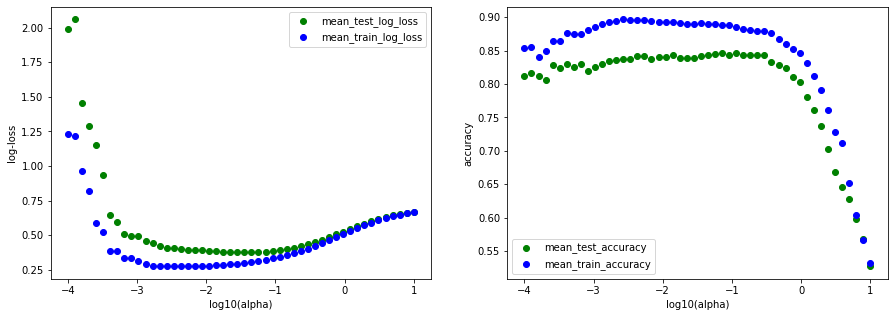

In [0]:
fig,(ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

ax0.scatter(np.log10(gs_log.cv_results_['param_alpha'].astype(np.float64)), 
            -gs_log.cv_results_['mean_test_neg_log_loss'], 
            color='green', label='mean_test_log_loss')
ax0.scatter(np.log10(gs_log.cv_results_['param_alpha'].astype(np.float64)), 
            -gs_log.cv_results_['mean_train_neg_log_loss'], 
            color='blue', label='mean_train_log_loss')
ax0.set_xlabel('log10(alpha)')
ax0.set_ylabel('log-loss')
handles, labels = ax0.get_legend_handles_labels()
ax0.legend(handles, labels)

ax1.scatter(np.log10(gs_log.cv_results_['param_alpha'].astype(np.float64)), gs_log.cv_results_['mean_test_accuracy'], 
            color='green', label='mean_test_accuracy')
ax1.scatter(np.log10(gs_log.cv_results_['param_alpha'].astype(np.float64)), gs_log.cv_results_['mean_train_accuracy'], 
            color='blue', label='mean_train_accuracy')
ax1.set_xlabel('log10(alpha)')
ax1.set_ylabel('accuracy')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels)

In [0]:
print('Best model:')
print(gs_log.best_estimator_)
print('Minimal average loss: {:.4}'.format(-gs_log_results.mean_test_neg_log_loss.iloc[0]))
print('Average accuracy score for best model: {:.4}'.format(gs_log_results.mean_test_accuracy.iloc[0]))

Best model:
SGDClassifier(alpha=0.03556480306223128, loss='log', max_iter=10000,
              random_state=100)
Minimal average loss: 0.3819
Average accuracy score for best model: 0.853


## K-NN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

# KNN with 10 neighbors and uniform weights
knn_clf = KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto', n_jobs=4)
knn_clf.fit(X_train_sc, y_train)

print('Train accuracy: {:.4}'.format(accuracy_score(y_train, knn_clf.predict(X_train_sc))))
print('Test accuracy: {:.4}'.format(accuracy_score(y_test, knn_clf.predict(X_test_sc))))

Train accuracy: 0.8534
Test accuracy: 0.7551


In [0]:
# Estimate loss on cross-validation
predicted = np.array(['']*X_sc.shape[0])
kf = KFold(n_splits=5, random_state=0)

for train_index, test_index in kf.split(X_sc):
    knn_clf.fit(X_sc[train_index,:], y.iloc[train_index])
    predicted[test_index] = knn_clf.predict(X_sc[test_index,:])

print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Accuracy: 0.7504


In [0]:
# Estimate optimal parameters set
parameters = {'n_neighbors': np.arange(1, 50, 1), 'weights': ['uniform', 'distance'], 'algorithm': ['auto']}
gs_knn = GridSearchCV(KNeighborsClassifier(), parameters, scoring='accuracy', n_jobs=4, cv=5, return_train_score=True)
gs_knn.fit(X_sc, y)
gs_knn_results = pd.DataFrame(gs_knn.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [0]:
gs_knn_results[['mean_test_score', 'param_n_neighbors', 'param_weights']].head(10)

,mean_test_score,param_n_neighbors,param_weights
97,0.813118,49,distance
95,0.813118,48,distance
82,0.810029,42,uniform
86,0.810006,44,uniform
84,0.808467,43,uniform
76,0.806988,39,uniform
77,0.806976,39,distance
78,0.806976,40,uniform
91,0.806976,46,distance
83,0.806952,42,distance


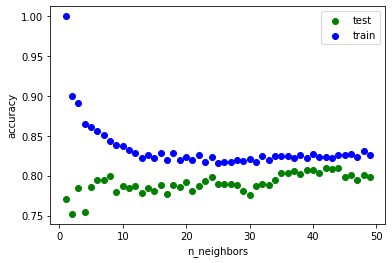

In [0]:
# Let's compare accuracy scores for different n_neighbors parameter values
uniform_idx = gs_knn_results.param_weights == 'uniform'
plt.scatter(gs_knn_results.param_n_neighbors[uniform_idx], 
            gs_knn_results.mean_test_score[uniform_idx], 
            color='green',
            label='test')
plt.scatter(gs_knn_results.param_n_neighbors[uniform_idx], 
            gs_knn_results.mean_train_score[uniform_idx], 
            color='blue',
            label='train')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

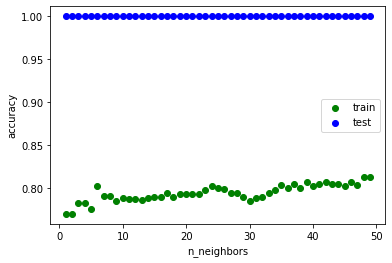

In [0]:
# Now let's do the same but neighbor weight will be inversely proportional to distance
distance_idx = gs_knn_results.param_weights == 'distance'
plt.scatter(gs_knn_results.param_n_neighbors[distance_idx], 
            gs_knn_results.mean_test_score[distance_idx], 
            color='green',
            label='train')
plt.scatter(gs_knn_results.param_n_neighbors[distance_idx], 
            gs_knn_results.mean_train_score[distance_idx], 
            color='blue',
            label='test')
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [0]:
print('Best model:')
print(gs_knn.best_estimator_)
print('Highest average accuracy score on test sets: {}'.format(gs_knn.best_score_))

Best model:
KNeighborsClassifier(n_neighbors=48, weights='distance')
Highest average accuracy score on test sets: 0.8131180270111568


##  Naive Bayes classificator

In [0]:
# Naive Bayes classificator with Gaussian distributions p(x_i|y)
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB() # initialize classifier without parameters, so prior probabilities will be estimated data
gnb_clf.fit(X_train_sc, y_train)

print('Train accuracy: {:.4}'.format(accuracy_score(y_train, gnb_clf.predict(X_train_sc))))
print('Test accuracy: {:.4}'.format(accuracy_score(y_test, gnb_clf.predict(X_test_sc))))

Train accuracy: 0.849
Test accuracy: 0.7755


In [0]:
print('Prior classes probabilities: {}'.format(gnb_clf.class_prior_))
print('Estimated average parameters in each class: {}'.format(gnb_clf.theta_))
print('Estimated standard deviations of parameters in each class: {}'.format(gnb_clf.sigma_))

Prior classes probabilities: [0.44201313 0.55798687]
Estimated average parameters in each class: [[ 0.17957267  0.26058656  0.37728223  0.53814601 -0.07897237  0.25106971
  -0.07059262  0.17389614 -0.18089432  0.05911618 -0.18089432 -0.01144586
   0.09633643 -0.06873337  0.06584462 -0.21891446 -0.16369915  0.0151315
  -0.11532401 -0.00776908  0.16347334  0.00869769  0.11913913  0.1974628
  -0.00999691 -0.20461109  0.22487912  0.03759254 -0.01998694 -0.04682929
  -0.04811835  0.06547537  0.84457355  0.52017057  0.04374351  0.
  -0.14070775]
 [-0.14224973 -0.20642543 -0.29886671 -0.42629605  0.0625585  -0.19888659
   0.05592043 -0.13775302  0.14329668 -0.04682929  0.14329668  0.00906691
  -0.07631356  0.05444761 -0.05215927  0.17341459  0.1296754  -0.01198652
   0.09135471  0.00615433 -0.12949653 -0.00688993 -0.09437688 -0.15642151
   0.00791912  0.16208408 -0.17813954 -0.02977918  0.01583279  0.03709614
   0.03811728 -0.05186676 -0.66903473 -0.41205669 -0.03465172  0.
   0.11146261]]
Es

In [0]:
# Estimate accuracy using cross-validation
predicted = np.array(['']*X_sc.shape[0])
kf = KFold(n_splits=5, random_state=0)

for train_index, test_index in kf.split(X_sc):
    gnb_clf.fit(X_sc[train_index,:], y.iloc[train_index])
    predicted[test_index] = gnb_clf.predict(X_sc[test_index,:])

print('Accuracy: {:.4}'.format(accuracy_score(y, predicted)))

Accuracy: 0.6815


In [0]:
# Estimate prediction performance dependence on the prior probability
parameters = {'priors': [[p, 1-p] for p in np.arange(0.01, 1, 0.01)]}
gs_gnb = GridSearchCV(GaussianNB(), parameters, scoring='accuracy', n_jobs=4, cv=5, return_train_score=True)
gs_gnb.fit(X_sc, y)

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=4,
             param_grid={'priors': [[0.01, 0.99], [0.02, 0.98], [0.03, 0.97],
                                    [0.04, 0.96], [0.05, 0.95],
                                    [0.060000000000000005, 0.94],
                                    [0.06999999999999999, 0.93], [0.08, 0.92],
                                    [0.09, 0.91], [0.09999999999999999, 0.9],
                                    [0.11, 0.89], [0.12, 0.88], [0.13, 0.87],
                                    [0.14, 0.86], [0.15000000000000002, 0.85],
                                    [0.16, 0.84], [0.17, 0.83],
                                    [0.18000000000000002, 0.82], [0.19, 0.81],
                                    [0.2, 0.8], [0.21000000000000002, 0.79],
                                    [0.22, 0.78], [0.23, 0.77],
                                    [0.24000000000000002, 0.76], [0.25, 0.75],
                                    [0.26, 0.74], [0.27, 0.73]

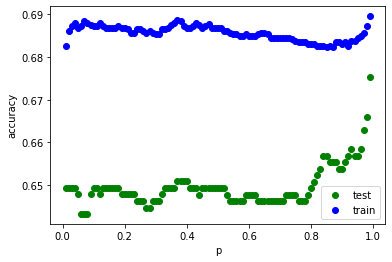

In [0]:
plt.scatter([x[0] for x in gs_gnb.cv_results_['param_priors']], 
            gs_gnb.cv_results_['mean_test_score'], 
            color='green',
            label='test')
plt.scatter([x[0] for x in gs_gnb.cv_results_['param_priors']], 
            gs_gnb.cv_results_['mean_train_score'], 
            color='blue',
            label='train')
plt.legend(['test','train'])
plt.xlabel('p')
plt.ylabel('accuracy')
plt.show()

## SVM

In [0]:
from sklearn.svm import SVC

# Linear SVM with regularization
svm_clf = SVC(C=1., kernel='linear')
svm_clf.fit(X_train_sc, y_train)

print('Number of support vectors: {}'.format(svm_clf.n_support_))
print('Indicies of support vectors:{}'.format(svm_clf.support_))
print('Model coefficients: {}'.format(svm_clf.coef_))
print('\nTrain accuracy: {:.4}'.format(accuracy_score(y_train, svm_clf.predict(X_train_sc))))
print('Test accuracy: {:.4}'.format(accuracy_score(y_test, svm_clf.predict(X_test_sc))))

Number of support vectors: [71 61]
Indicies of support vectors:[ 17  23  27  30  36  41  42  56  61  62  66  72  88 112 133 139 140 144
 150 155 158 163 169 170 180 211 219 223 225 229 232 237 243 244 249 264
 266 270 271 274 284 288 291 293 299 302 305 309 311 315 317 327 328 342
 351 356 370 373 384 386 388 401 409 411 420 426 432 448 450 451 455   1
   6   9  10  12  16  18  26  32  73  74  76  78  83  91 121 126 132 135
 145 147 156 161 165 167 174 188 192 194 196 206 212 238 248 269 275 286
 289 297 298 307 313 322 325 338 344 346 348 361 363 372 377 385 406 412
 417 422 428 439 443 449]
Model coefficients: [[-8.54106879e-03 -6.66574586e-03 -1.34412520e-01 -4.93633687e-01
   1.00721263e-01 -4.49494914e-01 -9.96043956e-03 -1.49270571e-02
   2.15555994e-02 -6.02236918e-02  2.15555994e-02 -2.44046667e-02
  -4.55565302e-02 -4.01062296e-02 -9.54658386e-02  7.21837803e-01
   2.22044605e-16  2.64694907e-01  2.16683775e-01 -9.65282781e-03
  -3.13743440e-02 -6.95054011e-03 -8.12855433e-02 

In [0]:
# Search for optimal parameters (try different kernels)
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'sigmoid'], 
              'class_weight': [None, 'balanced'], 'random_state': [0, 10, 100]}
gs_svm = GridSearchCV(SVC(), parameters, scoring='accuracy', n_jobs=4, cv=5, return_train_score=True)
gs_svm.fit(X_sc, y)
gs_svm_results = pd.DataFrame(gs_svm.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [0]:
gs_svm_results[['mean_test_score', 'param_C', 'param_kernel', 'param_class_weight', 'param_random_state']].head(10)

,mean_test_score,param_C,param_kernel,param_class_weight,param_random_state
35,0.863699,1,sigmoid,balanced,100
34,0.863699,1,sigmoid,balanced,10
33,0.863699,1,sigmoid,balanced,0
17,0.859084,0.1,sigmoid,balanced,100
16,0.859084,0.1,sigmoid,balanced,10
15,0.859084,0.1,sigmoid,balanced,0
25,0.857581,1,sigmoid,None,10
26,0.857581,1,sigmoid,None,100
24,0.857581,1,sigmoid,None,0
10,0.854480,0.1,linear,balanced,10


In [0]:
# Search for regularization parameters
parameters = {'C': np.logspace(-3, 1, num=50, base=10), 'kernel': ['sigmoid'], 'probability': [True]}
gs_svm = GridSearchCV(SVC(), parameters, scoring='accuracy', n_jobs=4, cv=5, return_train_score=True)
gs_svm.fit(X_sc, y)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=4,
             param_grid={'C': array([1.00000000e-03, 1.20679264e-03, 1.45634848e-03, 1.75751062e-03,
       2.12095089e-03, 2.55954792e-03, 3.08884360e-03, 3.72759372e-03,
       4.49843267e-03, 5.42867544e-03, 6.55128557e-03, 7.90604321e-03,
       9.54095476e-03, 1.15139540e-02, 1.38949549e-02, 1.67683294e-02,
       2.02358965e-02, 2.44205309e-02, 2.94705170e-02...
       4.09491506e-01, 4.94171336e-01, 5.96362332e-01, 7.19685673e-01,
       8.68511374e-01, 1.04811313e+00, 1.26485522e+00, 1.52641797e+00,
       1.84206997e+00, 2.22299648e+00, 2.68269580e+00, 3.23745754e+00,
       3.90693994e+00, 4.71486636e+00, 5.68986603e+00, 6.86648845e+00,
       8.28642773e+00, 1.00000000e+01]),
                         'kernel': ['sigmoid'], 'probability': [True]},
             return_train_score=True, scoring='accuracy')

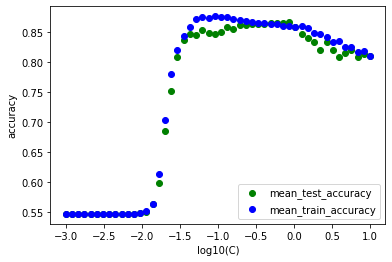

In [0]:
plt.scatter(np.log10(gs_svm.cv_results_['param_C'].astype(np.float64)), 
            gs_svm.cv_results_['mean_test_score'], color='green')
plt.scatter(np.log10(gs_svm.cv_results_['param_C'].astype(np.float64)), 
            gs_svm.cv_results_['mean_train_score'], color='blue')
plt.xlabel('log10(C)')
plt.ylabel('accuracy')
plt.legend(['mean_test_accuracy', 'mean_train_accuracy'])
plt.show()

In [0]:
print('Best model:')
print(gs_svm.best_estimator_)
print('Highest average accuracy on test set: {}'.format(gs_svm.best_score_))

Best model:
SVC(C=0.868511373751352, kernel='sigmoid', probability=True)
Highest average accuracy on test set: 0.8667527891955373


## Decision tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

# Build classification tree with default parameters
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train_sc, y_train)

print('Number of features considered for split: {}')
print('Train accuracy: {:.4}'.format(accuracy_score(y_train, dt_clf.predict(X_train_sc))))
print('Test accuracy: {:.4}'.format(accuracy_score(y_test, dt_clf.predict(X_test_sc))))

Number of features considered for split: {}
Train accuracy: 1.0
Test accuracy: 0.8265


In [0]:
# Search for optimal parameters
parameters = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [5, 10, 20, None],
              'min_samples_split': [2, 20, 50], 'max_features': ['sqrt', 'log2', None], 'random_state': [0], 
              'class_weight': [None, 'balanced']}
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy', 
                     n_jobs=4, cv=5, return_train_score=True)
gs_dt.fit(X_sc, y)
gs_dt_results = pd.DataFrame(gs_dt.cv_results_).sort_values(by='mean_test_score', ascending=False)

In [0]:
gs_dt_results[['mean_test_score', 'param_criterion', 'param_splitter', 'param_max_depth', 'param_min_samples_split', 'param_max_features', 'param_class_weight']].head(10)

,mean_test_score,param_criterion,param_splitter,param_max_depth,param_min_samples_split,param_max_features,param_class_weight
77,0.857557,entropy,random,5,50,sqrt,None
5,0.857557,gini,random,5,50,sqrt,None
221,0.857557,entropy,random,5,50,sqrt,balanced
149,0.856031,gini,random,5,50,sqrt,balanced
275,0.852977,entropy,random,None,50,sqrt,balanced
257,0.852977,entropy,random,20,50,sqrt,balanced
1,0.852954,gini,random,5,2,sqrt,None
158,0.852930,gini,best,5,20,None,balanced
285,0.849947,entropy,random,None,20,None,balanced
267,0.849947,entropy,random,20,20,None,balanced


In [0]:
# Specify max_depth and min_samples_split parameters
parameters = {'criterion': ['gini'], 'splitter': ['random'], 'max_depth': np.arange(1, 20, 1),
              'min_samples_split': np.arange(2, 50, 1), 'max_features': ['sqrt'], 'random_state': [0]}
gs_dt = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='accuracy', 
                     n_jobs=4, cv=5, return_train_score=True)
gs_dt.fit(X_sc, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'max_features': ['sqrt'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'random_state': [0], 'splitter': ['random']},
             return_train_score=True, scoring='accuracy')

In [0]:
print('Best model:')
print(gs_dt.best_estimator_)
print('Highest average accuracy score on test sets: {}'.format(gs_dt.best_score_))

Best model:
DecisionTreeClassifier(max_depth=7, max_features='sqrt', min_samples_split=22,
                       random_state=0, splitter='random')
Highest average accuracy score on test sets: 0.8697944803288316


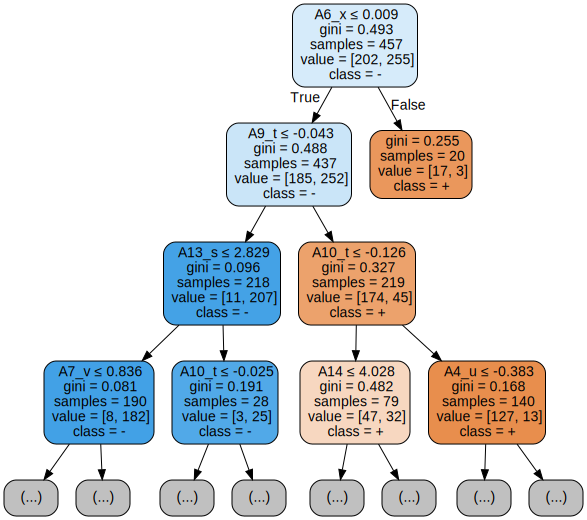

In [0]:
import graphviz
from sklearn import tree

gs_dt.best_estimator_.fit(X_train_sc, y_train)
dot_data = tree.export_graphviz(gs_dt.best_estimator_, out_file=None, 
                                feature_names=X.columns,  
                                class_names=y.unique(),  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=3,
                                )
graph = graphviz.Source(dot_data)  
graph

## Evaluation

In [0]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score

# Train classifiest with best parameters on train set
gs_log.best_estimator_.fit(X_train_sc, y_train)
gs_knn.best_estimator_.fit(X_train_sc, y_train)
gs_svm.best_estimator_.fit(X_train_sc, y_train)
gs_dt.best_estimator_.fit(X_train_sc, y_train)
gnb_clf.fit(X_train_sc, y_train)

GaussianNB()

In [0]:
# Estimate models performance on test set
predictions = {'Logistic Regression': gs_log.best_estimator_.predict(X_test_sc),
               'K-NN': gs_knn.best_estimator_.predict(X_test_sc),
               'SVM': gs_svm.best_estimator_.predict(X_test_sc),
               'Decision Trees': gs_dt.best_estimator_.predict(X_test_sc), 
               'Naive Bayes': gnb_clf.predict(X_test_sc)
              }

print('Accuracy: ')
for model in predictions:
    print('\t' + model + ': {:.4}'.format(accuracy_score(y_test, predictions[model])))
    
print('Precision: ')
for model in predictions:
    print('\t' + model + ': {:.4}'.format(precision_score(y_test, predictions[model], pos_label='+')))
    
print('Recall: ')
for model in predictions:
    print('\t' + model + ': {:.4}'.format(recall_score(y_test, predictions[model], pos_label='+')))
    
print('F1-score: ')
for model in predictions:
    print('\t' + model + ': {:.4}'.format(f1_score(y_test, predictions[model], pos_label='+')))

Accuracy: 
	Logistic Regression: 0.8469
	K-NN: 0.801
	SVM: 0.852
	Decision Trees: 0.8367
	Naive Bayes: 0.7755
Precision: 
	Logistic Regression: 0.8333
	K-NN: 0.8571
	SVM: 0.7876
	Decision Trees: 0.7768
	Naive Bayes: 0.7778
Recall: 
	Logistic Regression: 0.8511
	K-NN: 0.7021
	SVM: 0.9468
	Decision Trees: 0.9255
	Naive Bayes: 0.7447
F1-score: 
	Logistic Regression: 0.8421
	K-NN: 0.7719
	SVM: 0.8599
	Decision Trees: 0.8447
	Naive Bayes: 0.7609


AUC: 
	Logistic Regression: 0.9136
	K-NN: 0.8906
	SVM: 0.9108
	Naive Bayes: 0.8495
	Decision Trees: 0.873


(0.0, 1.0)

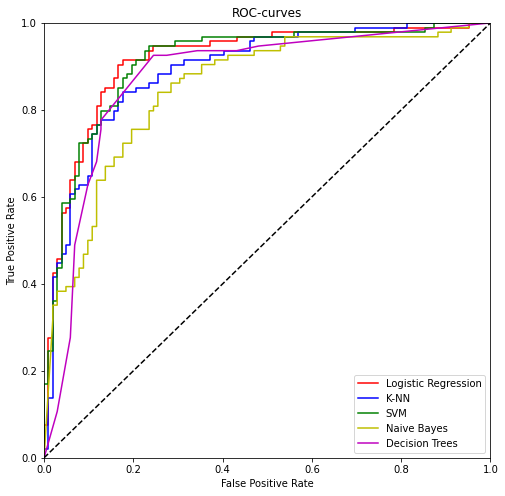

In [0]:
# Classification results may change depends on the threshold value for the probability of belonging to a class
probas = {'Logistic Regression': gs_log.best_estimator_.predict_proba(X_test_sc),
          'K-NN': gs_knn.best_estimator_.predict_proba(X_test_sc),
          'SVM': gs_svm.best_estimator_.predict_proba(X_test_sc),
          'Naive Bayes': gnb_clf.predict_proba(X_test_sc),
          'Decision Trees': gs_dt.best_estimator_.predict_proba(X_test_sc)
         }

classes = {'Logistic Regression': gs_log.best_estimator_.classes_ == '+',
           'K-NN': gs_knn.best_estimator_.classes_ == '+',
           'SVM': gs_svm.best_estimator_.classes_ == '+',
           'Naive Bayes': gnb_clf.classes_ == '+',
           'Decision Trees': gs_dt.best_estimator_.classes_ == '+'
          }

markers = {'Logistic Regression': '-r',
           'K-NN': '-b',
           'SVM': '-g',
           'Naive Bayes': '-y',
           'Decision Trees': '-m'
          }

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1, title="ROC-curves")
print('AUC: ')
for model in probas:
    print('\t' + model + ': {:.4}'.format(roc_auc_score(y_test == '+', probas[model][:,classes[model]])))
    rc = roc_curve(y_test == '+', probas[model][:,classes[model]])
    ax.plot(rc[0], rc[1], markers[model])

ax.plot([0,1], [0,1], '--k')
ax.legend(probas.keys())
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_xlim([0,1])
ax.set_ylim([0,1])

### Decision boundaries

Code provided below is a modification of code from sklearn docs:
: http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

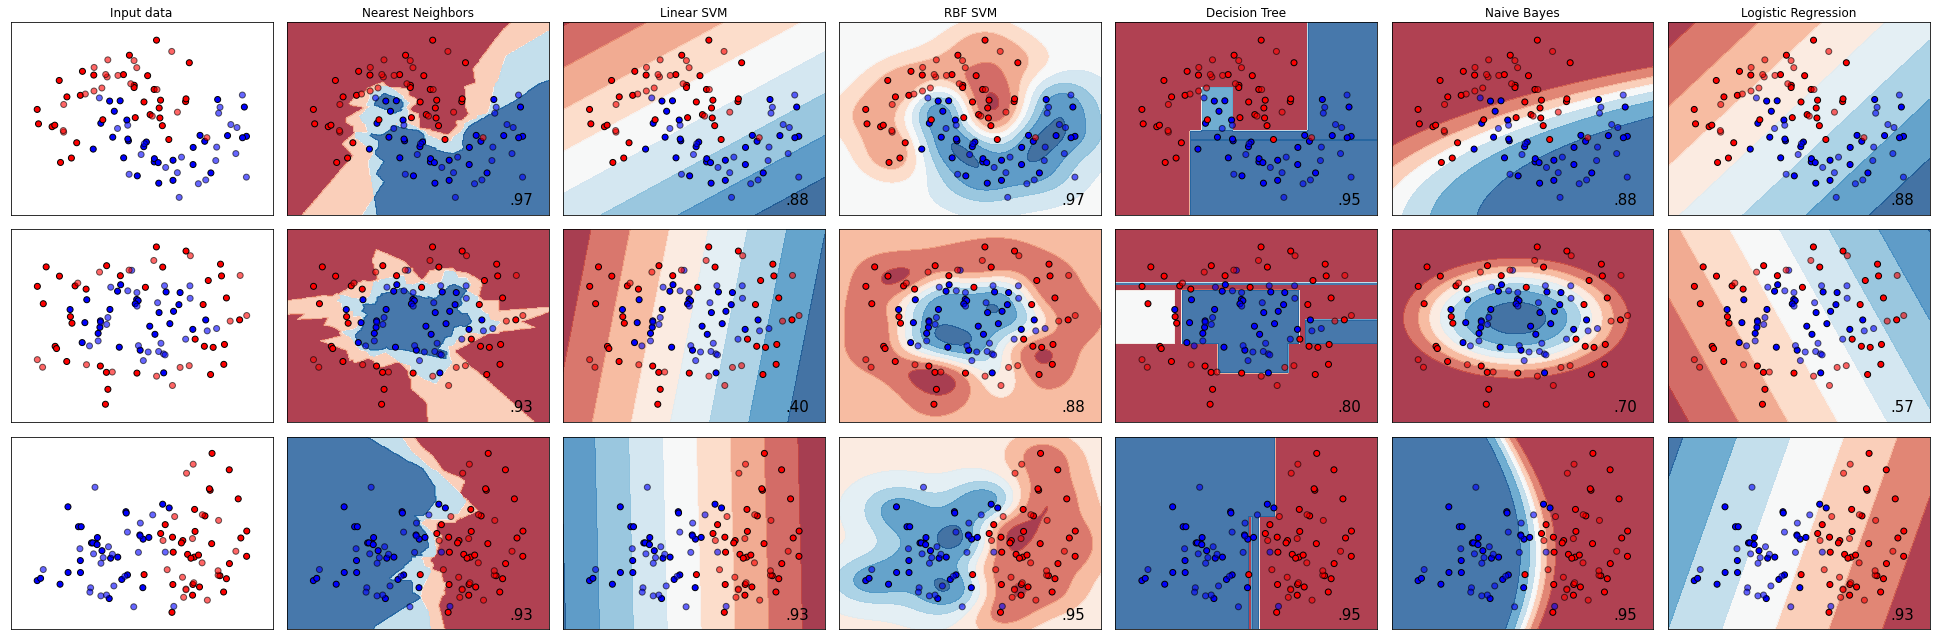

In [0]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap

h = .02  # set grid interval

# Classificators chosen for comparison
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree", "Naive Bayes", "Logistic Regression"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    SGDClassifier(loss='log', penalty='l2')]

# Let's generate 3 datasets with 2 features
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y) # linearly seperable data (with some noise)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over all datasets
for ds_cnt, ds in enumerate(datasets):
    # scale and split data into train and test sets стандартизируем и разделим на обучающую и тестовую выборки
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # visualize generated data
    cm = plt.cm.RdBu # choose color palette выбираем цветовую палитру
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # plot train dataset
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # plot test dataset (dim dots on the plot)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over all classificators
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train) # train classificators обучим классификатор
        score = clf.score(X_test, y_test)

        # Plot decision boundary. To do this, assign each point on the grid 
        # a color corresponding to the probability of belonging to classes.
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot points of train data
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # The same for test data
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()